# **ENSEMBLE TECHNIQUES PROJECT**


---



**DOMAIN:** Telecom


---



**CONTEXT:** A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt
to retain customers. The end goal is to develop focused customer retention programs


---



**DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:
* **Customers who left within the last month** – the column is called Churn
* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
* **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* **Demographic info about customers** – gender, age range, and if they have partners and dependents


---



**PROJECT OBJECTIVE:** The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the
potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention.


---


# **STEPS AND TASK**


---







> ## **STEP 1: DATA UNDERSTANDING & EXPLORATION:**


---



>> ### **Step 1.A.**
>> **Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.**


---




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Read the CSV file and assign it to a variable
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TelcomCustomer-Churn_1.csv')

In [3]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


>> ### **Step 1.B.**
>> **Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.**


---



In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TelcomCustomer-Churn_2.csv')

In [5]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


>> ### **Step 1.C.**
>> **Merge both the DataFrames on key ‘customerID’ to form a single DataFrame.**


---



In [6]:
# Merge the two DataFrames on the 'customerID' key
df = pd.merge(df1, df2, on='customerID')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


>> ### **Step 1.D.**
>> **D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.**

>> → Compare the columns of the original dataframes and the merged ones along with the dimensions of the dataframes (no. of columns & no. of rows).
---



In [8]:
df1.shape

(7043, 10)

In [9]:
df2.shape

(7043, 12)

In [10]:
df.shape

(7043, 21)

In [11]:
# Check if all columns from df1 are in df
df1_columns_incorporated = all(col in df.columns for col in df1.columns)

# Check if all columns from df2 are in df
df2_columns_incorporated = all(col in df.columns for col in df2.columns)

# Check if the total number of rows for df1, df2, and df are the same
rows_match = (len(df1) == len(df2) == len(df))

# Check if the number of columns in df1 + number of columns in df2 - 1 is equal to the number of columns in df
columns_match = (len(df1.columns) + len(df2.columns) - 1 == len(df.columns))

# Print the results
if df1_columns_incorporated and df2_columns_incorporated and rows_match and columns_match:
    print("All columns from df1 and df2 are incorporated in df, and dimensions match.")
else:
    print("Columns from df1 and df2 are missing in df, or dimensions do not match.")

All columns from df1 and df2 are incorporated in df, and dimensions match.



> ## **STEP 2: DATA CLEANING & ANALYSIS:**


---



>> ### **Step 2.A.**
>> **Impute missing/unexpected values in the DataFrame.**


---

Let's check the datatype of each column.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.shape

(7043, 21)

Let's check the value counts of each column to identify unexpected values.

In [14]:
for column in df.columns:
    print(f"Value Counts for '{column}':")
    print(df[column].value_counts())
    print()

Value Counts for 'customerID':
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Value Counts for 'gender':
Male      3555
Female    3488
Name: gender, dtype: int64

Value Counts for 'SeniorCitizen':
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Value Counts for 'Partner':
No     3641
Yes    3402
Name: Partner, dtype: int64

Value Counts for 'Dependents':
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value Counts for 'tenure':
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Value Counts for 'PhoneService':
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value Counts for 'MultipleLines':
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: 

The column **'SeniorCitizen'** is a categorical column with values 0 and 1, while its datatype is **int64**. However since we will encode all the other categorical column for model building, we will leave it as as int.

The column **'TotalCharges'** has datatype object while it appears to be a continuous variable. The column has **11 empty entries**. We will convert them to **NaN**.

In [15]:
import numpy as np
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

Let's check whether the empty values have been replaced by NaN.

In [16]:
df['TotalCharges'].isnull().sum()

11

Let's calculate percentage null values in the column.

In [17]:
percent_null=(df['TotalCharges'].isnull().sum()/df.shape[0])*100
print('Percentage null values in Total Charges column:', percent_null)

Percentage null values in Total Charges column: 0.1561834445548772


Let's change the 'TotalCharges' column datatype to float.

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

Let's check the columns with missing 'TotalCharges' value

In [19]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Let's check the distribution of the **'TotalCharges'** column.

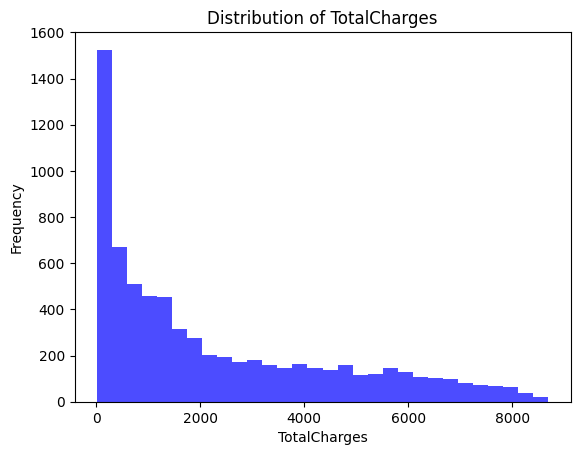

In [20]:
import matplotlib.pyplot as plt

total_charges = df['TotalCharges']

# Create a histogram to visualize the distribution
plt.hist(total_charges, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

Since all the missing values have churn as No, lets compare the distribution of Total Charges for different churn values (Yes and No).

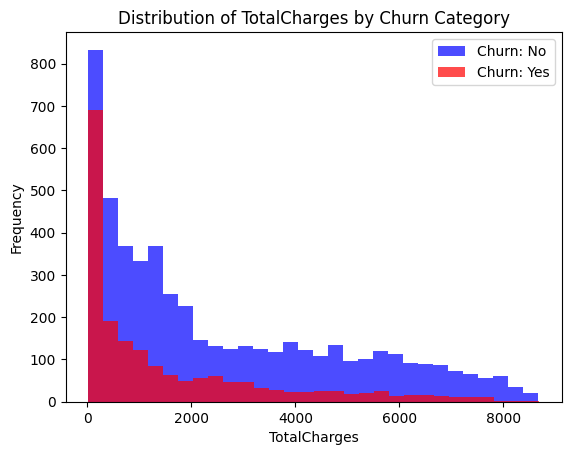

In [21]:
# Filter the data based on the 'Churn' categories
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']

# Create histograms for each category with specified colors
plt.hist(churn_no, bins=30, color='blue', alpha=0.7, label='Churn: No')
plt.hist(churn_yes, bins=30, color='red', alpha=0.7, label='Churn: Yes')

plt.title('Distribution of TotalCharges by Churn Category')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The distribution of Total Charges for both Churn as Yes and No is right skewed.

Let's calculate the median of 'TotalCharges' for Churn=No.

In [22]:
df[df['Churn'] == 'No']['TotalCharges'].median()

1683.6

In [23]:
df[df['Churn'] == 'Yes']['TotalCharges'].median()

703.55

In [24]:
df['TotalCharges'].median()

1397.475

There are several options for imputing the missing values.

* The **'TotalCharges'** column is heavily **right skewed**. Hence we may impute the missing values with median.

* The **percentage missing values** is **0.15%** which is very minimal. Hence, we may drop the missing values.

* The output variable i.e **churn** for all the rows with missing values is **no** which is also the dominant category for churn. Hence, we may drop these values.

* We may also consider imputing the missing values with median **TotalCharges** where churn is No.

**Let's choose to drop the missing values.**

In [25]:
# Drop columns with null values
df = df.dropna()

In [26]:
df.shape

(7032, 21)

>> ### **Step 2.B.**
>> **Make sure all the variables with continuous values are of ‘Float’ type.**

>> `[For Example: MonthlyCharges, TotalCharges]`


---

Let's check the datatypes again.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Lets check the value counts of **tenure** column to check whether its continuous.

In [28]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

Lets check the distribution of **tenure** column.

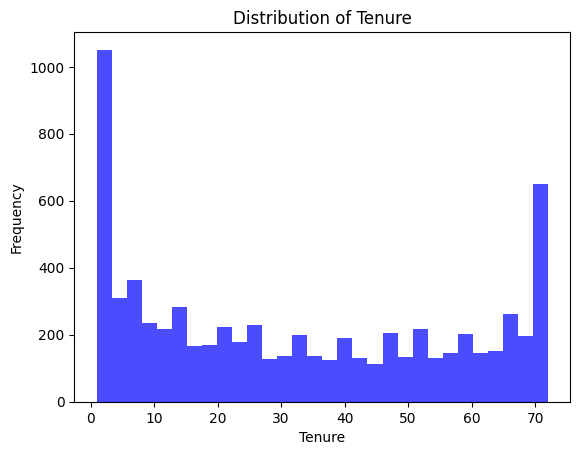

In [29]:
tenure = df['tenure']

# Create a histogram to visualize the distribution
plt.hist(tenure, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

The **tenure** column appears to be a continuous variable. Lets change it to float datatype.

In [30]:
df['tenure'] = df['tenure'].astype(float)

Lets check the datatypes again.

In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

All the continuous columns have been changed to float datatype.

>> ### **Step 2.C.**
>> **Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features Clearly show percentage distribution in the pie-chart.**


---

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_pie_charts(dataframe):
    # Filter for categorical columns
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).drop(columns=['customerID'])

    # Loop through each categorical column
    for column in categorical_columns.columns:
        # Count the frequency of each category
        category_counts = dataframe[column].value_counts()

        # Create a pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'{column} Distribution')
        plt.show()

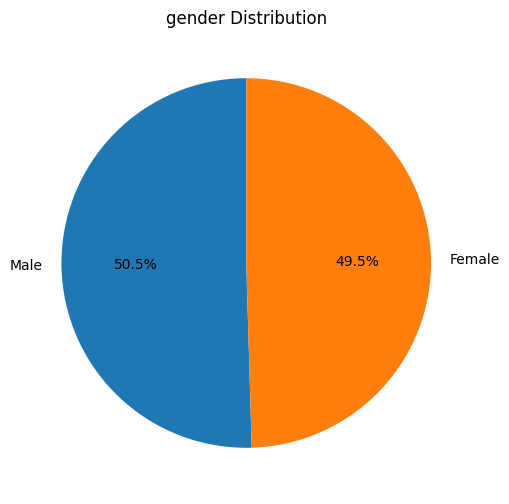

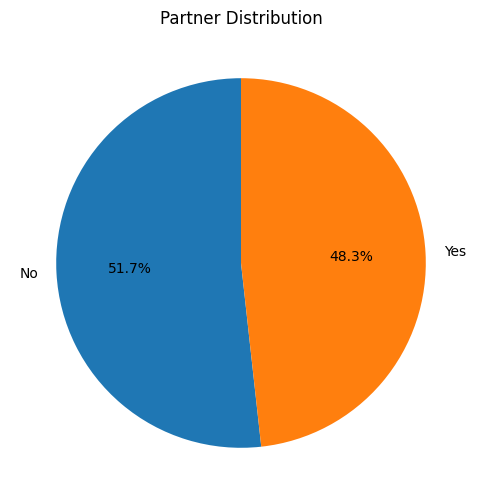

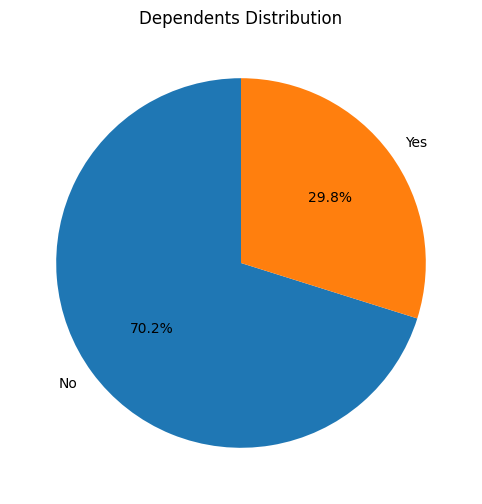

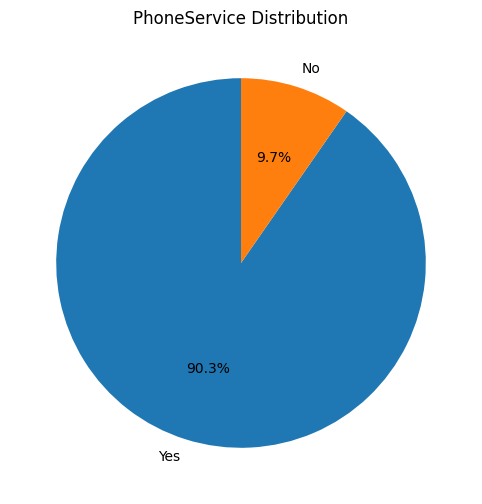

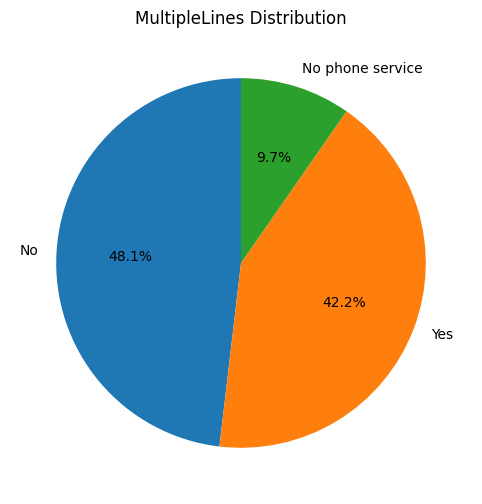

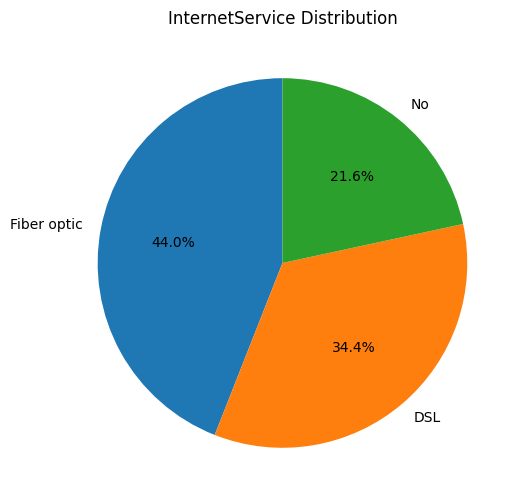

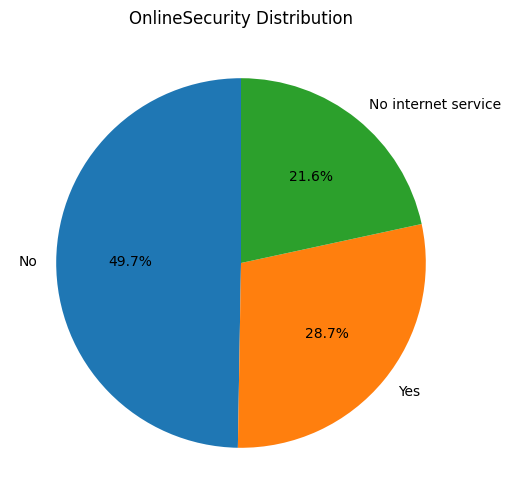

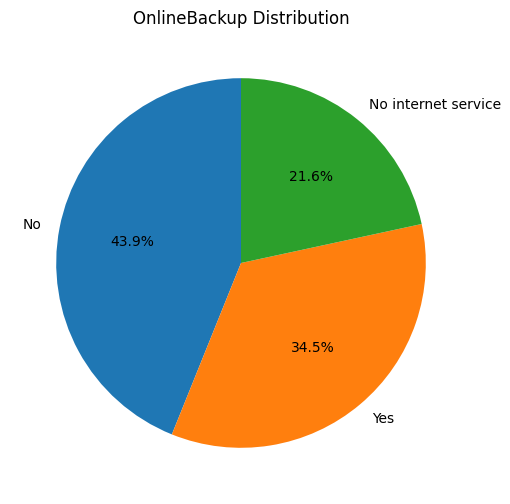

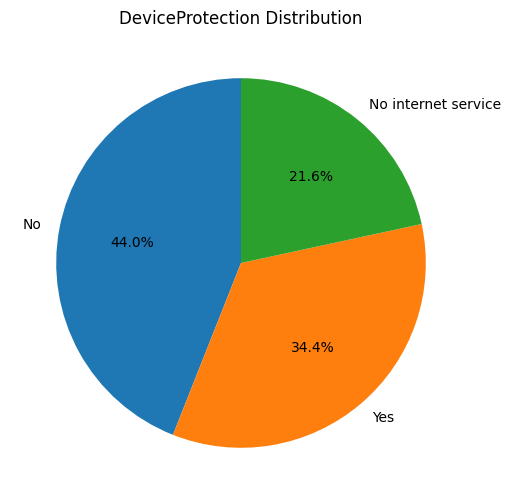

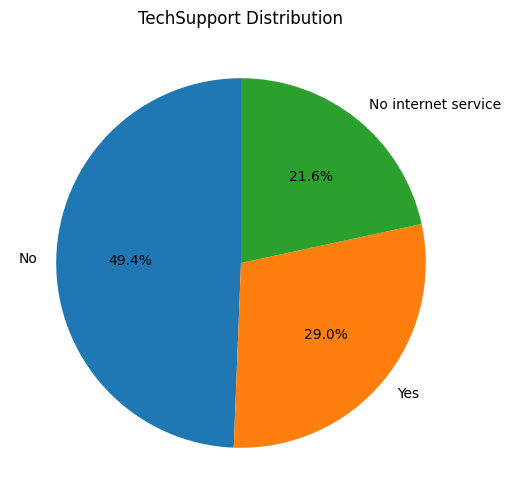

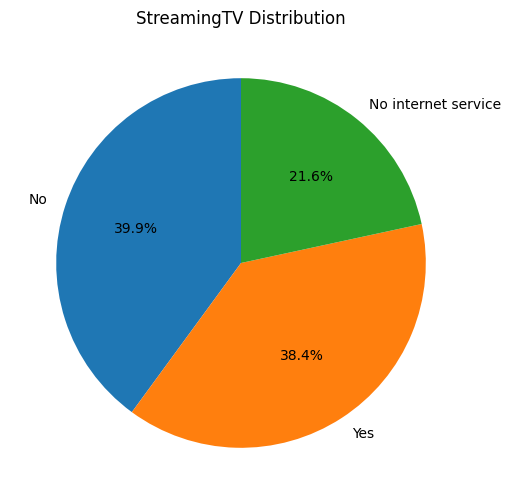

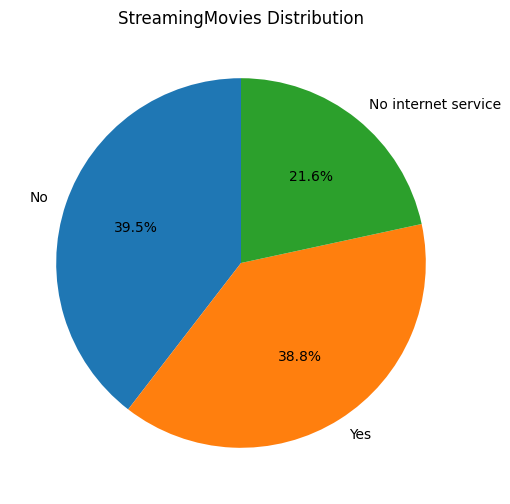

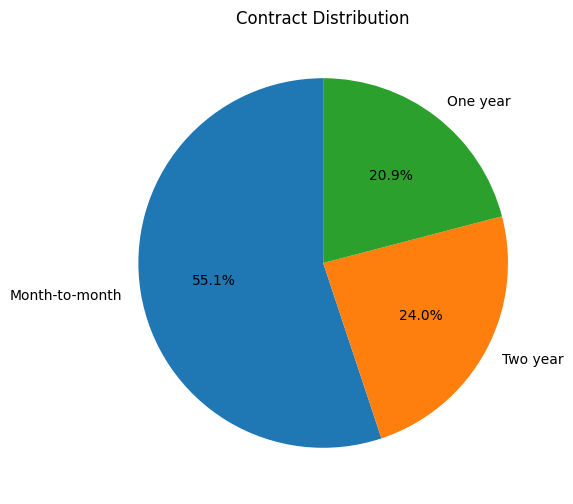

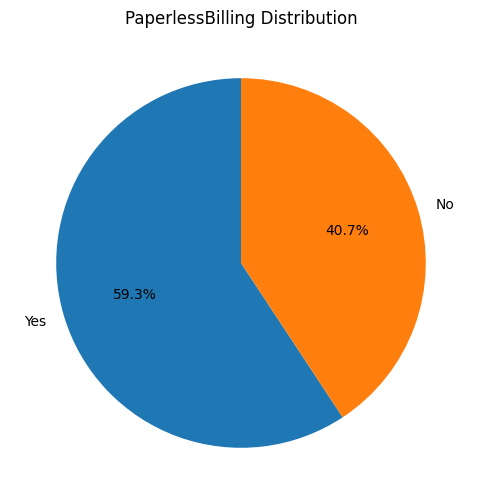

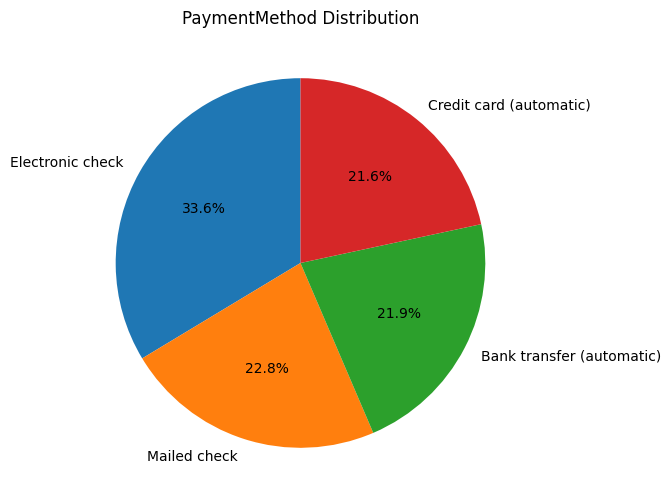

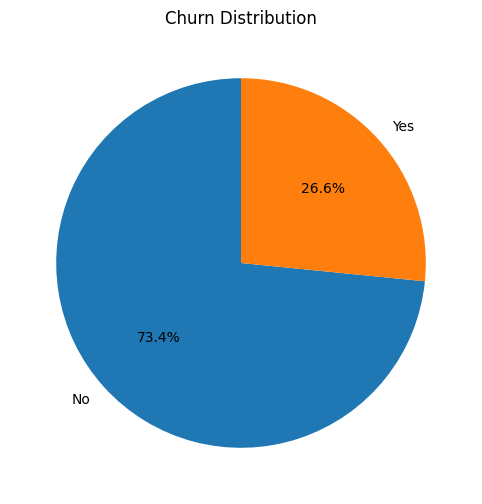

In [33]:
# Call the function and pass your DataFrame as input
plot_categorical_pie_charts(df)

>> ### **Step 2.D.**
>> **Share insights for Q2.c**


---

We can draw insights based on the percentage distribution in the pie charts for the appropriate categorical features:

* **Gender:** The distribution of gender is almost balanced, with approximately 50.47% males and 49.53% females. Gender is not a strong differentiator in customer behavior.

* **Senior Citizen:** Most customers are not senior citizens, accounting for about 83.76% of the dataset. Senior citizens make up about 16.24% of the customer base.

* **Partner:** The dataset is nearly evenly split between customers with and without partners. About 51.75% of customers do not have partners, while 48.25% have partners.

* **Dependents:** The majority of customers do not have dependents, representing about 70.15% of the dataset. Around 29.85% of customers have dependents.

* **Phone Service:** The vast majority of customers have phone service, with approximately 90.33% having it. Only about 9.67% do not have phone service.

* **Multiple Lines:** Among customers with phone service, 48.14% have a single line (No), 42.19% have multiple lines (Yes), and 9.67% do not have phone service (No phone service).

* **Internet Service:** Fiber optic is the most popular internet service, with approximately 44.03% of customers using it. DSL is used by around 34.36% of customers, and approximately 21.62% do not have internet service (No).

* **Online Security, Online Backup, Device Protection, and Tech Support:** The majority of customers do not subscribe to these additional services (No). Approximately 49.73% do not have online security, 43.90% do not have online backup, 43.99% do not have device protection, and 49.37% do not have tech support. About 28.65% have online security, 34.49% have online backup, 34.39% have device protection, and 29.01% have tech support.

* **Streaming TV and Streaming Movies:** Around 38.44% of customers have streaming TV, and 38.84% have streaming movies. 39.95% do not have streaming TV, and 39.55% do not have streaming movies. About 21.62% do not have internet service.

* **Contract:** The majority of customers have month-to-month contracts, accounting for approximately 55.11% of the dataset. Two-year contracts make up about 23.96%, and one-year contracts are chosen by approximately 20.93% of customers.

* **Paperless Billing:** About 59.27% of customers opt for paperless billing, while approximately 40.73% choose traditional paper billing.

* **Payment Method:** The most common payment method is "Electronic check," used by about 33.63% of customers. "Mailed check" is used by approximately 22.81%, "Bank transfer (automatic)" by 21.93%, and "Credit card (automatic)" by 21.63%.

* **Churn:** The dataset is imbalanced regarding churn. Approximately 73.42% of customers did not churn, while 26.58% did churn. Churn analysis may be critical for the telecom company.

These insights provide a clear view of the distribution of categorical features, which can be valuable for understanding customer demographics and behavior.







>> ### **Step 2.E.**
>> **Encode all the appropriate Categorical features with the best suitable approach.**


---

In [34]:
categorical_columns = df.select_dtypes(include=['object', 'category']).drop(columns=['customerID'])
categorical_columns.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [35]:
# Loop through each categorical column and print the value counts
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for gender:
Male      3549
Female    3483
Name: gender, dtype: int64


Value counts for Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64


Value counts for Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64


Value counts for PhoneService:
Yes    6352
No      680
Name: PhoneService, dtype: int64


Value counts for MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


Value counts for InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


Value counts for OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


Value counts for OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


Value counts for DeviceProtection:
No                     3094
Yes               

In [36]:
df_new = df.copy()

The column **SeniorCitizen** already has its values converted to 0 and 1.

Let's do the same for other columns with Yes and No as its categories.

In [37]:
# Define a list of columns with "Yes" and "No" categories
ordinal_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [38]:
from sklearn.preprocessing import LabelBinarizer

# Initialize the LabelBinarizer
binarizer = LabelBinarizer()

# Apply label binarization to the specified columns
for column in ordinal_columns:
    df_new[column] = binarizer.fit_transform(df_new[column])

# Now, the specified columns are encoded with "Yes" as 1 and "No" as 0

In [39]:
# Loop through each categorical column and print the value counts
for column in ordinal_columns:
    print(f"Value counts for {column}:")
    print(df_new[column].value_counts())
    print("\n")

Value counts for Partner:
0    3639
1    3393
Name: Partner, dtype: int64


Value counts for Dependents:
0    4933
1    2099
Name: Dependents, dtype: int64


Value counts for PhoneService:
1    6352
0     680
Name: PhoneService, dtype: int64


Value counts for PaperlessBilling:
1    4168
0    2864
Name: PaperlessBilling, dtype: int64


Value counts for Churn:
0    5163
1    1869
Name: Churn, dtype: int64




Next there are several columns with three categories:**Yes, No and No Internet service**. We will use a custom encoder to assign **-1 to No Internet Service, 0 to No and 1 to Yes.**

In [40]:
# Define a list of columns with "Yes," "No," and "No internet service" categories
ordinal_columns_with_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [41]:
# Define a dictionary to map values to their corresponding numeric values
value_mapping = {'No': 0, 'Yes': 1, 'No internet service': -1}

# Create a custom mapping function
def custom_map(x):
    return value_mapping.get(x, x)  # If the value is not found in the mapping, keep the original value

# Apply the custom mapping function to the specified columns
for column in ordinal_columns_with_service:
    df_new[column] = df_new[column].map(custom_map)

In [42]:
# Loop through each categorical column and print the value counts
for column in ordinal_columns_with_service:
    print(f"Value counts for {column}:")
    print(df_new[column].value_counts())
    print("\n")

Value counts for OnlineSecurity:
 0    3497
 1    2015
-1    1520
Name: OnlineSecurity, dtype: int64


Value counts for OnlineBackup:
 0    3087
 1    2425
-1    1520
Name: OnlineBackup, dtype: int64


Value counts for DeviceProtection:
 0    3094
 1    2418
-1    1520
Name: DeviceProtection, dtype: int64


Value counts for TechSupport:
 0    3472
 1    2040
-1    1520
Name: TechSupport, dtype: int64


Value counts for StreamingTV:
 0    2809
 1    2703
-1    1520
Name: StreamingTV, dtype: int64


Value counts for StreamingMovies:
 0    2781
 1    2731
-1    1520
Name: StreamingMovies, dtype: int64




We will do the same with **MultipleLines** column which contains categories: **Yes, No and No phone service**.

In [43]:
# Define the dictionary to map values to their corresponding numeric values
value_mapping = {'No': 0, 'Yes': 1, 'No phone service': -1}

# Apply the mapping directly to the "MultipleLines" column
df_new['MultipleLines'] = df_new['MultipleLines'].replace(value_mapping)

In [44]:
df_new['MultipleLines'].value_counts()

 0    3385
 1    2967
-1     680
Name: MultipleLines, dtype: int64

The column **'MultipleLines'** tells us the the number of people with no phone serice, the no of people with phone service but no multiple lines and those with multiple lines.
The **'PhoneService'** column tells us the number of people with and without phone service. Both the columns are redundant and hence, to avoid multicollinearity, **we drop 'PhoneService' column**.

In [45]:
df_new = df_new.drop('PhoneService', axis=1)

For the rest of the columns we will use one hot encoding.

In [46]:
# Define a list of non-ordinal columns
non_ordinal_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

In [47]:
# Loop through each categorical column and print the value counts
for column in non_ordinal_columns:
    print(f"Value counts for {column}:")
    print(df_new[column].value_counts())
    print("\n")

Value counts for gender:
Male      3549
Female    3483
Name: gender, dtype: int64


Value counts for InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


Value counts for Contract:
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


Value counts for PaymentMethod:
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64




In [48]:
# Define the list of non-ordinal columns you want to one-hot encode
non_ordinal_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Perform one-hot encoding with drop_first=True for the specified non-ordinal columns
df_new = pd.get_dummies(df_new, columns=non_ordinal_columns, drop_first=True)

In [49]:
df_new.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1.0,-1,0,1,0,0,...,29.85,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34.0,0,1,0,1,0,...,1889.50,0,1,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,2.0,0,1,1,0,0,...,108.15,1,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45.0,-1,1,0,1,1,...,1840.75,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2.0,0,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


In [50]:
df_new.dtypes

customerID                                object
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [51]:
df_new.shape

(7032, 24)

>> ### **Step 2.F.**
>> **Split the data into 80% train and 20% test.**


---

Let's drop **'CustomerID'** column.

In [52]:
df_new=df_new.drop('customerID', axis=1)

In [53]:
X = df_new.drop('Churn', axis=1)  # X contains all columns except "Churn"
Y = df_new['Churn']  # Y is the "Churn" column

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

>> ### **Step 2.G.**
>> **Normalize/Standardize the data with the best suitable approach.**


---

Let's check the distribution of the numerical columns to determine whether to scale them.

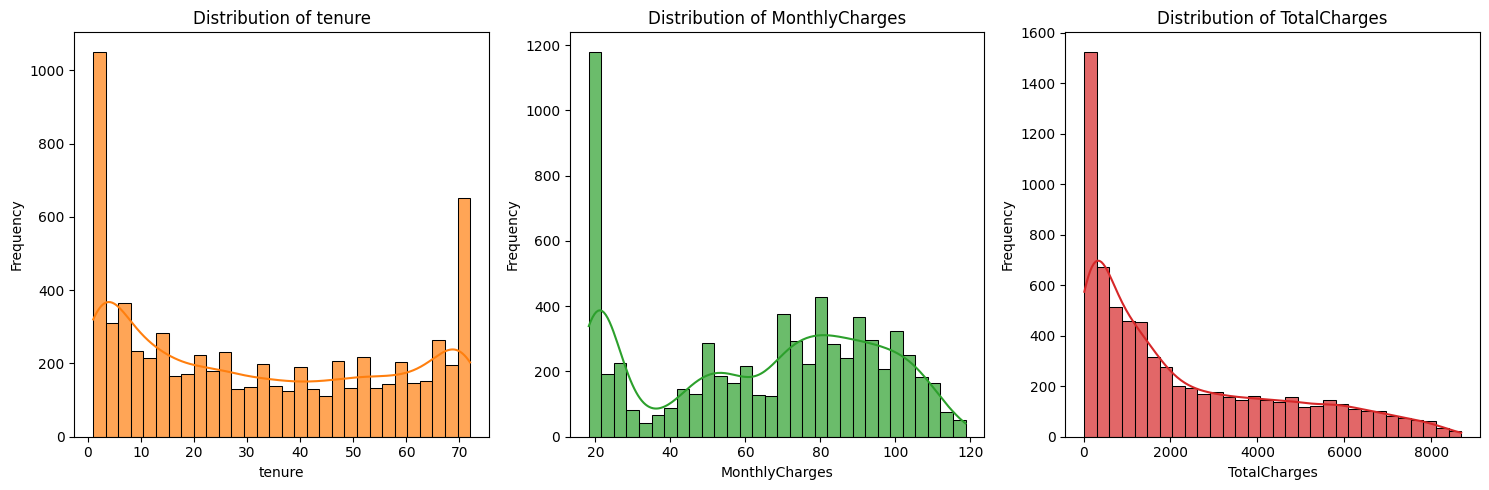

In [55]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(130 + i)
    sns.histplot(df_new[col], bins=30, color='C' + str(i), alpha=0.7, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

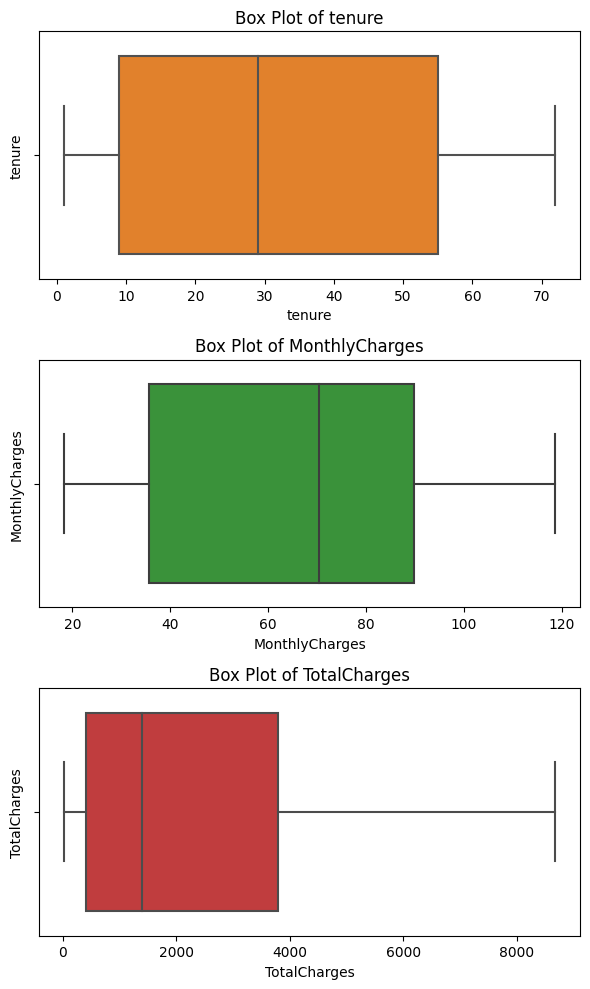

In [56]:
plt.figure(figsize=(6, 10))  # Adjust the figure size for better vertical display

for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)  # Create a subplot with 3 rows and 1 column
    sns.boxplot(data=df_new, x=col, color='C' + str(i))  # Use y=col to display the box plot vertically
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)  # Set the ylabel to display the column name

plt.tight_layout()
plt.show()

The numerical columns are not normally distributed. Also none of the numerical columns have outliers. While the TotalCharges column is right skewed, the other two columns are randomly distributed.

Decision Trees and ensemble methods like Random Forests, Gradient Boosting, and AdaBoost, often do not require feature scaling because they are based on binary splits and work well with the raw, unscaled data.

However, scaling can affect the performance and convergence of ensemble models such as Gradient Boosting by helping the models converge faster during the optimization process.

Since, the data is non-normally distributed, we may proceed with MinMaxScaler to scale the data.

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data for the selected columns
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Transform the test data using the same scaler
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

> ## **STEP 3: MODEL BUILDING AND PERFORMANCE IMPROVEMENT:**


---

#### **Defining functions for model performance and storing them:**
We will build two functions: **check_performance_train** and **check_performance_test**, that will print all performance metrics, classification report and confusion matrix for both test and train data. We form another function **store_model_performance** to store all the key metrics along with model name into a dataframe for comparision purpose.

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [59]:
def check_performance_train(Y_train_pred):
    # Calculate evaluation metrics
    accuracy_train = accuracy_score(Y_train, Y_train_pred)
    recall_train = recall_score(Y_train, Y_train_pred)
    precision_train = precision_score(Y_train, Y_train_pred)
    f1_train = f1_score(Y_train, Y_train_pred)

    # Print evaluation metrics
    print("Accuracy Score for train data:", accuracy_train)
    print("Recall for Training Data:", recall_train)
    print("Precision for Training Data:", precision_train)
    print("F1 Score for Training Data:", f1_train)

    print("\nClassification report for Training Data:\n")
    print(classification_report(Y_train, Y_train_pred))

    # Confusion Matrix
    train_confusion_matrix = confusion_matrix(Y_train, Y_train_pred)
    print("\nConfusion Matrix (Training Data)")
    print(train_confusion_matrix)

    # Calculate the percentage values for the training confusion matrix
    total_samples = len(Y_train)
    train_confusion_matrix_percentage = (train_confusion_matrix / total_samples) * 100

    # Plot the confusion matrix as a heatmap for the training data with percentage values
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_confusion_matrix_percentage, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
                yticklabels=['Actual Non-Churn', 'Actual Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Training Data) - Percentage')
    plt.show()

In [60]:
def check_performance_test(Y_test_pred):

    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    recall_test = recall_score(Y_test, Y_test_pred)
    precision_test = precision_score(Y_test, Y_test_pred)
    f1_test = f1_score(Y_test, Y_test_pred)

    # Print evaluation metrics
    print("Accuracy Score for test data:", accuracy_test)
    print("Recall for Test Data:", recall_test)
    print("Precision for Test Data:", precision_test)
    print("F1 Score for Test Data:", f1_test)

    print("\nClassification report for Test Data:\n")
    print(classification_report(Y_test, Y_test_pred))

    # Confusion Matrix
    test_confusion_matrix = confusion_matrix(Y_test, Y_test_pred)
    print("\nConfusion Matrix (Test Data)")
    print(test_confusion_matrix)

    # Calculate the percentage values for the test confusion matrix
    total_samples = len(Y_test)
    test_confusion_matrix_percentage = (test_confusion_matrix / total_samples) * 100

    # Plot the confusion matrix as a heatmap for the test data with percentage values
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_confusion_matrix_percentage, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
                yticklabels=['Actual Non-Churn', 'Actual Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Test Data) - Percentage')
    plt.show()

In [61]:
# Create an empty DataFrame with columns
columns = ['Model Name', 'Train Accuracy', 'Test Accuracy',
           'Train Recall', 'Test Recall', 'Train Precision', 'Test Precision',
           'Train F1', 'Test F1', 'Train False Positives', 'Test False Positives',
           'Train False Negatives', 'Test False Negatives']

df_combined = pd.DataFrame(columns=columns)
df_decision_tree = pd.DataFrame(columns=columns)
df_random_forest = pd.DataFrame(columns=columns)
df_adaboost = pd.DataFrame(columns=columns)
df_gradient_boost = pd.DataFrame(columns=columns)

In [62]:
# Function to append new data to the DataFrame
def store_model_performance(existing_df, model_name, Y_train_pred, Y_test_pred):
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    train_recall = recall_score(Y_train, Y_train_pred)
    test_recall = recall_score(Y_test, Y_test_pred)

    train_precision = precision_score(Y_train, Y_train_pred)
    test_precision = precision_score(Y_test, Y_test_pred)

    train_f1 = f1_score(Y_train, Y_train_pred)
    test_f1 = f1_score(Y_test, Y_test_pred)

    # Confusion Matrix for Train Data
    train_confusion_matrix = confusion_matrix(Y_train, Y_train_pred)
    # Calculate the percentage values for the training confusion matrix
    total_samples = len(Y_train)
    train_confusion_matrix_percentage = (train_confusion_matrix / total_samples) * 100
    train_false_positives = train_confusion_matrix_percentage[0, 1]
    train_false_negatives = train_confusion_matrix_percentage[1, 0]

    # Confusion Matrix for Test Data
    test_confusion_matrix = confusion_matrix(Y_test, Y_test_pred)
    # Calculate the percentage values for the test confusion matrix
    total_samples = len(Y_test)
    test_confusion_matrix_percentage = (test_confusion_matrix / total_samples) * 100
    test_false_positives = test_confusion_matrix_percentage[0, 1]
    test_false_negatives = test_confusion_matrix_percentage[1, 0]

    # Create a DataFrame for the current model
    data = {
        'Model Name': [model_name],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Train Recall': [train_recall],
        'Test Recall': [test_recall],
        'Train Precision': [train_precision],
        'Test Precision': [test_precision],
        'Train F1': [train_f1],
        'Test F1': [test_f1],
        'Train False Positives': [train_false_positives],
        'Test False Positives': [test_false_positives],
        'Train False Negatives': [train_false_negatives],
        'Test False Negatives': [test_false_negatives],
    }

    new_df = pd.DataFrame(data)

    # Append the new DataFrame to the existing one
    #updated_df = existing_df.append(new_df, ignore_index=True)
    updated_df = pd.concat([existing_df, new_df], ignore_index=True)
    return updated_df

>> ### **Step 3.A.**
>> **Train a model using Decision tree and check the performance of the model on train and test data**


---

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [65]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
Y_train_pred_ddt = decision_tree.predict(X_train)
Y_test_pred_ddt = decision_tree.predict(X_test)

Accuracy Score for train data: 0.9976888888888888
Recall for Training Data: 0.9926421404682274
Precision for Training Data: 0.9986541049798116
F1 Score for Training Data: 0.9956390472995639

Classification report for Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Confusion Matrix (Training Data)
[[4128    2]
 [  11 1484]]


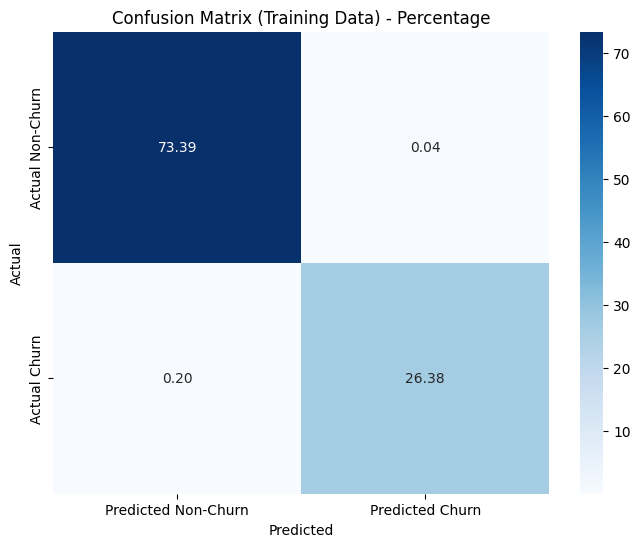

In [67]:
check_performance_train(Y_train_pred_ddt)

Accuracy Score for test data: 0.7171286425017769
Recall for Test Data: 0.5080213903743316
Precision for Test Data: 0.47029702970297027
F1 Score for Test Data: 0.4884318766066838

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1033
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407


Confusion Matrix (Test Data)
[[819 214]
 [184 190]]


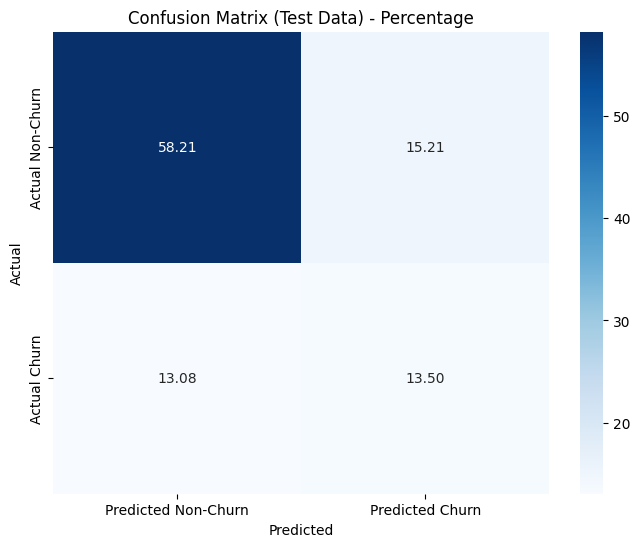

In [68]:
check_performance_test(Y_test_pred_ddt)

In [69]:
df_decision_tree = store_model_performance(df_decision_tree, 'Default Decision tree', Y_train_pred_ddt, Y_test_pred_ddt)

In [70]:
df_decision_tree

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Decision tree,0.997689,0.717129,0.992642,0.508021,0.998654,0.470297,0.995639,0.488432,0.035556,15.209666,0.195556,13.07747


**INSIGHTS:**

*  The model performs significantly better on the training data compared to the test data.
*  The confusion matrix for the test data shows a substantial number of false negatives (customers who churned but were predicted as non-churners) which directly affects recall.
*  It also demonstrates a significant number of false positives, impacting precision.
*  The recall for the test data is considerably lower compared to the training data.
*  Both precision and F1-score are relatively low on the test data.
*  This discrepancy suggests high variance and potential overfitting: the model may have learned the training data patterns too well but struggles to generalize to new, unseen data.
*  We need to optimize hyperparameters to reduce variance and have a better optimized model which is not prone to overfitting.

>> ### **Step 3.B.**
>> **Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b**


---

>>> #### **GridSeachCV**

Since, the **project objective** is to build **a model that will help to identify the potential customers who have a higher probability to churn**, which in turn will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention, **reducing the false negatives** and hence **high recall** will be most important. As a result, we will set the scoring parameter for GridSearchCV to **recall**.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_leaf_nodes': [10, 20, 50, 100],
    'min_impurity_decrease': [0.01, 0.1, 0.2],
}

# Create the GridSearchCV instance with scoring set to 'recall'
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=1, scoring='recall', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 30],
                         'max_leaf_nodes': [10, 20, 50, 100],
                         'min_impurity_decrease': [0.01, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='recall', verbose=1)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:")
print(best_params)
print("Score:", best_score)

Best Parameters:
{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score: 0.39464882943143814


>>> #### **Training using the best model**

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with the best parameters
best_decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    max_leaf_nodes=10,
    min_impurity_decrease= 0.01,
    min_samples_leaf=1,
    min_samples_split=2
)

# Train the model on the training data
best_decision_tree.fit(X_train, Y_train)

# Make predictions on the test data
Y_train_pred_bdt = best_decision_tree.predict(X_train)
Y_test_pred_bdt = best_decision_tree.predict(X_test)

Accuracy Score for train data: 0.7909333333333334
Recall for Training Data: 0.4100334448160535
Precision for Training Data: 0.6758544652701213
F1 Score for Training Data: 0.5104079933388842

Classification report for Training Data:

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4130
           1       0.68      0.41      0.51      1495

    accuracy                           0.79      5625
   macro avg       0.74      0.67      0.69      5625
weighted avg       0.78      0.79      0.77      5625


Confusion Matrix (Training Data)
[[3836  294]
 [ 882  613]]


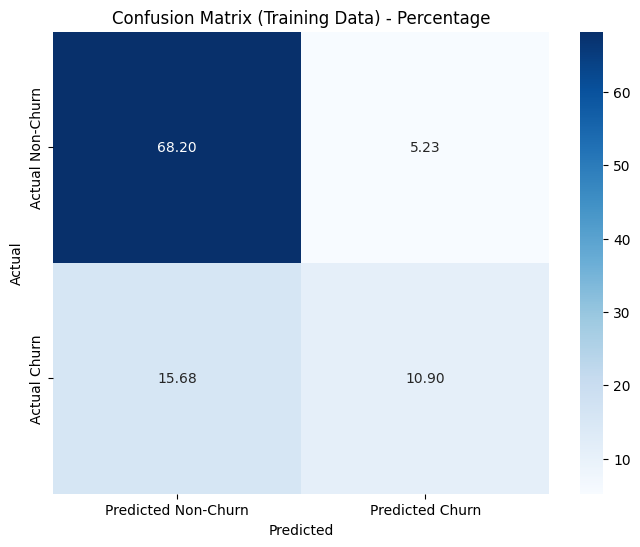

In [72]:
check_performance_train(Y_train_pred_bdt)

Accuracy Score for test data: 0.7874911158493249
Recall for Test Data: 0.39572192513368987
Precision for Test Data: 0.669683257918552
F1 Score for Test Data: 0.49747899159663855

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.67      0.40      0.50       374

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407


Confusion Matrix (Test Data)
[[960  73]
 [226 148]]


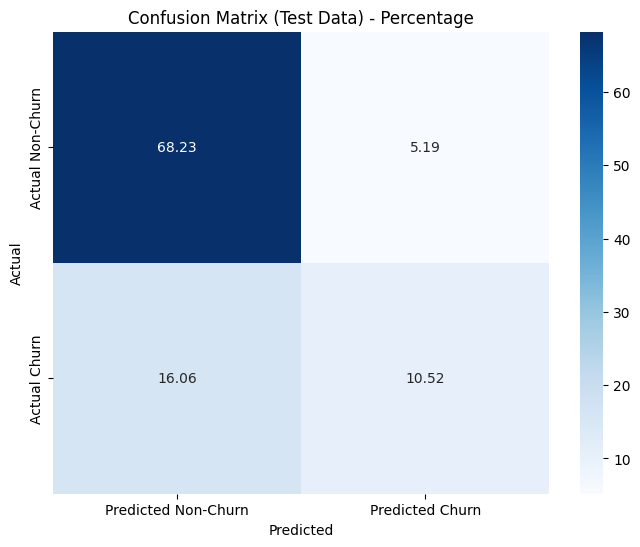

In [73]:
check_performance_test(Y_test_pred_bdt)

In [74]:
df_decision_tree = store_model_performance(df_decision_tree, 'Best Decision tree', Y_train_pred_bdt, Y_test_pred_bdt)

In [75]:
df_decision_tree

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Decision tree,0.997689,0.717129,0.992642,0.508021,0.998654,0.470297,0.995639,0.488432,0.035556,15.209666,0.195556,13.077470
1,Best Decision tree,0.790933,0.787491,0.410033,0.395722,0.675854,0.669683,0.510408,0.497479,5.226667,5.188344,15.680000,16.062544


**DIFFERENCES OBSERVED:**

**Accuracy:**

* The initial model achieved higher accuracy on the training data (99.77%) compared to the improved model (79.09%). However, on the test data, the improved model performs  better (78.75%) compared to the initial model (71.71%). This indicates less variance between test and train performance and hence seems to provide a more optimized model and not a overfit model like the default model.

**Recall, Precision, and F1-Score:**

* The initial model had notably higher recall, precision, and F1-score on both training and test data compared to the improved model. However the performance on the test and train performance varied significantly suggesting overfit. The new model performs similarly on both test and train data suggesting a more balanced model.

**Overfitting:**

* The initial model appeared to overfit the training data significantly, while the improved model, obtained through grid search with optimized hyperparameters, shows no overfitting.

**Trade-off:**

* The improved model achieved a better balance between recall, precision, and F1-score on the test data compared to the initial model. While recall decreased, precision increased, leading to a better F1-score in the improved model. Moreover it also achieved bias-variance trade-off to provide a balanced model.

**Confusion Matrices:**

* The confusion matrices show that both models still struggle to correctly identify churn cases (class 1), with a relatively high number of false negatives.

**Summary:**

* The improved model, despite having lower performance on certain metrics compared to the initial model on the training data, exhibits a more balanced performance on the test data. It manages to trade-off between recall and precision, resulting in a better F1-score as well as less variance in terms of performance on test and train data.
* Moreover, the recall scores as well as precision scores are also low and further improvement can be sought.
* Further improvements could be sought by adjusting the model or exploring different algorithms to better handle the churn prediction task without overfitting the data, especially reducing false negatives to improve recall.

>> ### **Step 3.C.**
>> **Train a model using Random forest and check the performance of the model on train and test data**


---

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [77]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

In [78]:
# Train the model on the training data
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [79]:
Y_train_pred_drf = random_forest.predict(X_train)
Y_test_pred_drf = random_forest.predict(X_test)

Accuracy Score for train data: 0.9976888888888888
Recall for Training Data: 0.9953177257525083
Precision for Training Data: 0.9959839357429718
F1 Score for Training Data: 0.9956507193041151

Classification report for Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Confusion Matrix (Training Data)
[[4124    6]
 [   7 1488]]


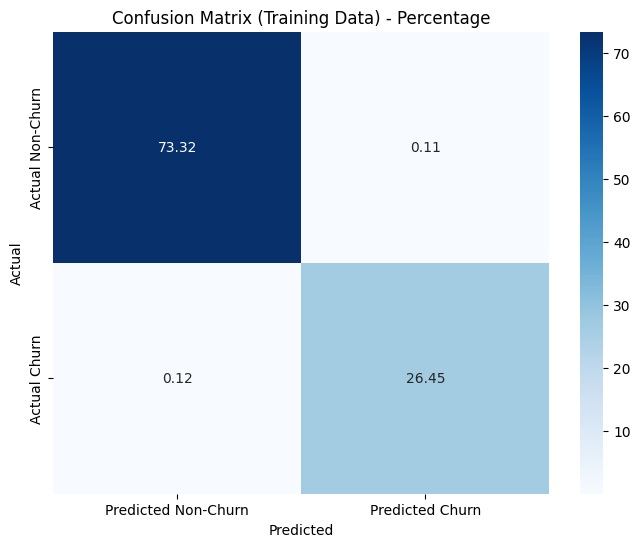

In [80]:
check_performance_train(Y_train_pred_drf)

Accuracy Score for test data: 0.7825159914712153
Recall for Test Data: 0.47593582887700536
Precision for Test Data: 0.6180555555555556
F1 Score for Test Data: 0.5377643504531723

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix (Test Data)
[[923 110]
 [196 178]]


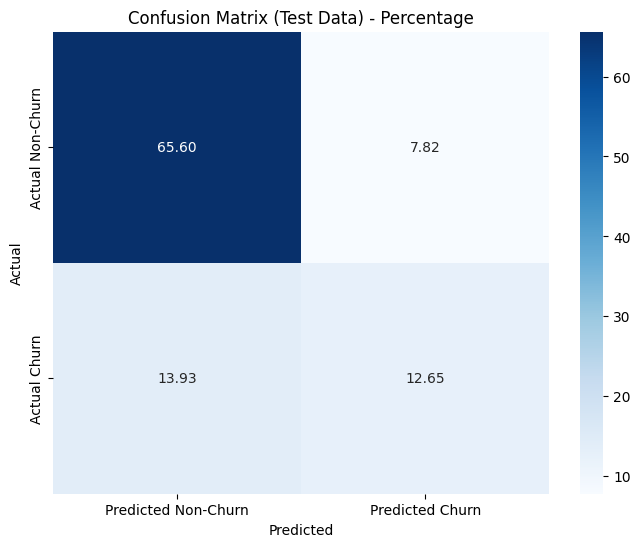

In [81]:
check_performance_test(Y_test_pred_drf)

In [82]:
df_random_forest = store_model_performance(df_random_forest, 'Default Random Forest', Y_train_pred_drf, Y_test_pred_drf)

In [83]:
df_random_forest

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Random Forest,0.997689,0.782516,0.995318,0.475936,0.995984,0.618056,0.995651,0.537764,0.106667,7.818053,0.124444,13.930348


**Observations and Analysis:**

**Comparison with Decision Tree Models:**

* The Random Forest model performs slightly worse than the initial Decision Tree model on the test data in terms of accuracy, recall, precision, and F1-score.

*  The Random Forest model demonstrates a recall (47.59%) compared to both the initial Decision Tree (50.80%) and the improved Decision Tree (39.57%) models. It still has a considerable number of false negatives.

* Precision  is 61.81% compared to the initial Decision Tree (47.03%) and the improved Decision Tree (66.97%) models.

**Overfitting:**
* Similar to the initial Decision Tree model, there is a notable difference in performance between the training and test data. The Random Forest model seems to overfit significantly, indicated by the higher performance on the training data than on the test data.

**Confusion Matrices:**

* The confusion matrix for the Random Forest model also shows a higher number of false negatives, suggesting that it struggles to correctly identify churn cases (class 1).

**Summary:**

* Though, the Random Forest model performs better on the test data, showing improvements in recall compared to the Decision Tree models while maintaining a decent precision score, it still seems to be a overfit model with high variance and between test and train data performance.

* We may try hyperparameter tuning to obtain a more balanced model with better performance metrics.


>> ### **Step 3.D.**
>> **Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d**


---

Since, the **project objective** is to build **a model that will help to identify thepotential customers who have a higher probability to churn**, which in turn will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention, **reducing the false negatives** and hence **high recall** will be most important. As a result, we will set the scoring parameter for GridSearchCV to **recall**.

>>> #### **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 250, 500, 1000, 2000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2'],
    'oob_score': [False, True],
    'max_samples': [0.1, 0.5, 0.7, 1],
}

# Create the GridSearchCV instance for Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid, cv=5, scoring='recall', verbose=3)

# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_features=sqrt, max_samples=0.1, n_estimators=50, oob_score=False;, score=0.472 total time=   0.1s
[CV 2/5] END criterion=gini, max_features=sqrt, max_samples=0.1, n_estimators=50, oob_score=False;, score=0.505 total time=   0.1s
[CV 3/5] END criterion=gini, max_features=sqrt, max_samples=0.1, n_estimators=50, oob_score=False;, score=0.468 total time=   0.1s
[CV 4/5] END criterion=gini, max_features=sqrt, max_samples=0.1, n_estimators=50, oob_score=False;, score=0.512 total time=   0.1s
[CV 5/5] END criterion=gini, max_features=sqrt, max_samples=0.1, n_estimators=50, oob_score=False;, score=0.518 total time=   0.1s
[CV 1/5] END criterion=gini, max_features=sqrt, max_samples=0.1, n_estimators=50, oob_score=True;, score=0.472 total time=   0.2s
[CV 2/5] END criterion=gini, max_features=sqrt, max_samples=0.1, n_estimators=50, oob_score=True;, score=0.505 total time=   0.2s
[CV 3/5] END criterio

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.1, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 250, 500, 1000, 2000],
                         'oob_score': [False, True]},
             scoring='recall', verbose=3)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:")
print(best_params)
print("Best Score:", best_score)

Best Parameters:
{'criterion': 'gini', 'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 1000, 'oob_score': False}
Best Score: 0.5230769230769231


>>> #### **Training using the best model**

In [84]:
# Create a Random Forest classifier with the best parameters
best_random_forest = RandomForestClassifier(
    random_state=42,
    criterion = 'gini',
    max_features = 'sqrt',
    max_samples = 0.5,
    n_estimators = 1000,
    oob_score = False
)

# Train the model on the training data
best_random_forest.fit(X_train, Y_train)

# Make predictions on the test data
Y_train_pred_brf = best_random_forest.predict(X_train)
Y_test_pred_brf = best_random_forest.predict(X_test)

Accuracy Score for train data: 0.9630222222222222
Recall for Training Data: 0.8816053511705686
Precision for Training Data: 0.9770200148257969
F1 Score for Training Data: 0.9268635724331927

Classification report for Training Data:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4130
           1       0.98      0.88      0.93      1495

    accuracy                           0.96      5625
   macro avg       0.97      0.94      0.95      5625
weighted avg       0.96      0.96      0.96      5625


Confusion Matrix (Training Data)
[[4099   31]
 [ 177 1318]]


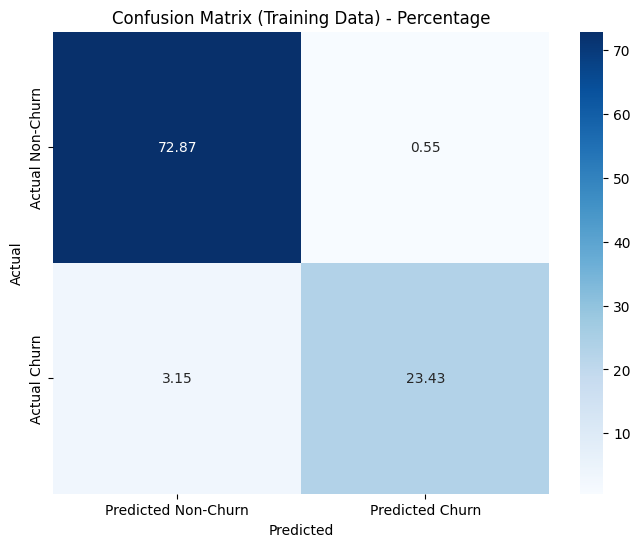

In [85]:
check_performance_train(Y_train_pred_brf)

Accuracy Score for test data: 0.8009950248756219
Recall for Test Data: 0.48128342245989303
Precision for Test Data: 0.6766917293233082
F1 Score for Test Data: 0.5624999999999999

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407


Confusion Matrix (Test Data)
[[947  86]
 [194 180]]


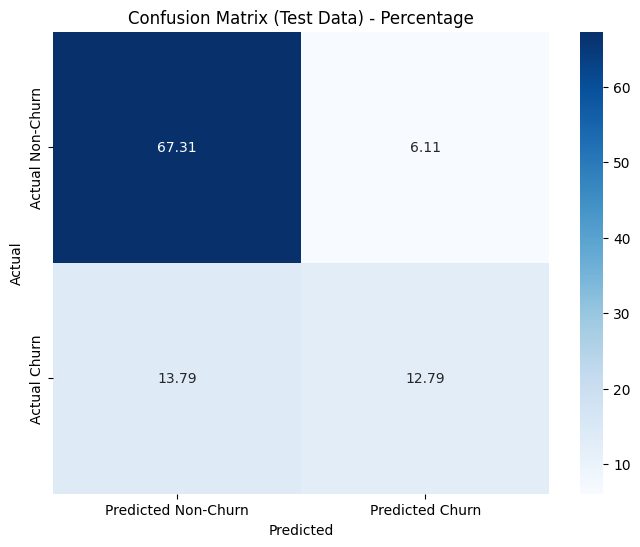

In [86]:
check_performance_test(Y_test_pred_brf)

In [87]:
df_random_forest = store_model_performance(df_random_forest, 'Best Random Forest', Y_train_pred_brf, Y_test_pred_brf)

In [88]:
df_random_forest

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Random Forest,0.997689,0.782516,0.995318,0.475936,0.995984,0.618056,0.995651,0.537764,0.106667,7.818053,0.124444,13.930348
1,Best Random Forest,0.963022,0.800995,0.881605,0.481283,0.977020,0.676692,0.926864,0.562500,0.551111,6.112296,3.146667,13.788202


**OBSERVATIONS AND ANALYSIS:**

**Accuracy Improvement:**

* The model obtained through GridSearchCV for the test slightly improved the accuracy score compared to the initial Random Forest model (from 78.25% to 80.1%).

**Recall Improvement:**

* The model obtained through GridSearchCV for the test slightly improved the recall score compared to the initial Random Forest model (from 47.59% to 48.13%).

**Precision and F1-Score:**

* Precision also improved from 61.81% to 67.67%, leading to an increased F1-score of 56.25% in the improved model.

**False Negatives:**

* Despite the improvement in recall, both models still suffer from a relatively high number of false negatives, impacting the model's ability to correctly identify churn cases (class 1).

**Overfitting:**

* The initial Random Forest model exhibited overfitting, which was somewhat reduced in the improved model. However, a difference between the performance on training and test data still exists.

**SUMMARY:**

* The improved Random Forest model from GridSearchCV shows a slight enhancement in recall and precision, contributing to a better F1-score compared to the initial Random Forest model.
* While the false negatives (churn cases predicted as non-churners) are reduced, further adjustments might be needed to lower them more and achieve higher recall, aligning with the project objective.
* The improved model still exhibits high variance with significant performance difference between train and test data and hence exhibits overfitting.
* We may try other algorthms to find a more balanced model that can further improve performance metrics.


>> ### **Step 3.E.**
>> **Train a model using Adaboost and check the performance of the model on train and test data**


---

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [90]:
# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

In [91]:
# Train the AdaBoost model on the training data
adaboost_classifier.fit(X_train, Y_train)

AdaBoostClassifier(random_state=42)

In [92]:
Y_train_pred_dab = adaboost_classifier.predict(X_train)
Y_test_pred_dab = adaboost_classifier.predict(X_test)

Accuracy Score for train data: 0.8104888888888889
Recall for Training Data: 0.5672240802675586
Precision for Training Data: 0.6692975532754538
F1 Score for Training Data: 0.6140477914554671

Classification report for Training Data:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.67      0.57      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.81      5625


Confusion Matrix (Training Data)
[[3711  419]
 [ 647  848]]


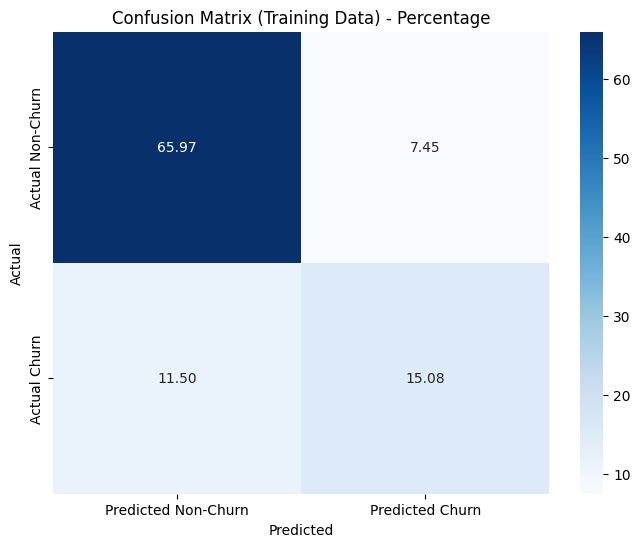

In [93]:
check_performance_train(Y_train_pred_dab)

Accuracy Score for test data: 0.7938877043354655
Recall for Test Data: 0.5294117647058824
Precision for Test Data: 0.6346153846153846
F1 Score for Test Data: 0.577259475218659

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407


Confusion Matrix (Test Data)
[[919 114]
 [176 198]]


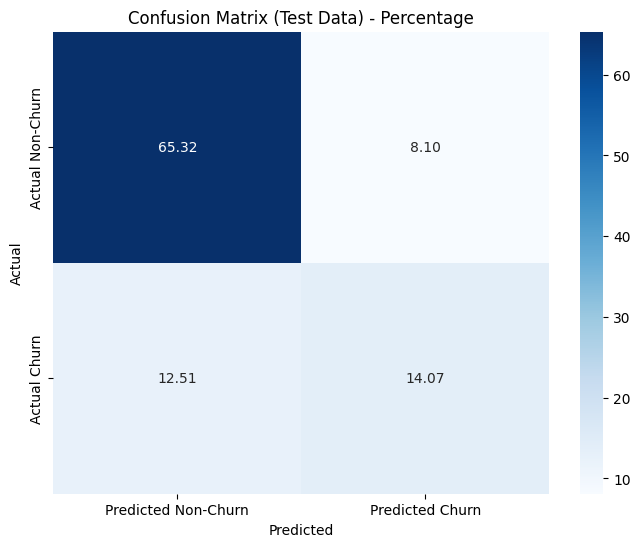

In [94]:
check_performance_test(Y_test_pred_dab)

In [95]:
df_adaboost = store_model_performance(df_adaboost, 'Default Adaboost', Y_train_pred_dab, Y_test_pred_dab)

In [96]:
df_adaboost

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Adaboost,0.810489,0.793888,0.567224,0.529412,0.669298,0.634615,0.614048,0.577259,7.448889,8.102345,11.502222,12.508884


**Observations and Analysis:**

The AdaBoost model demonstrates reasonably good performance on both training and test data with an accuracy of around 81% on the training data and 79% on the test data. The performance on both train and test data is similar indicating a balanced model with no overfit.

**Recall and Precision:**

* The model achieved a recall of 56.72% on the training data and 52.94% on the test data. While the recall is quite better than the previous models, it's still not notably high and we may try to improve it further.

* Precision of 66.93% on the training data and 63.46% on the test data indicates that the model identifies a substantial proportion of true positives among the predicted positives.

**F1-Score:**

* The F1-score, a balance between precision and recall, is around 61.40% on the training data and 57.73% on the test data.

**Overfitting:**

* There's almost no difference between the performance on the training and test data, suggesting a balanced model.

**False Negatives:**

* Similar to other models, the AdaBoost model also suffers from a significant number of false negatives, impacting the recall score. However it is lesser than the other models.

**Summary:**
* While the AdaBoost model performs reasonably well in terms of accuracy and precision, we may seek more improvement in reducing false negatives to achieve a higher recall.
* It is also a more balanced model compared to all the other models with the best performance in terms of recall till now.
* To enhance the model's ability to identify potential churners with higher recall, we may try hyperparameter tuning.

>> ### **Step 3.F.**
>> **Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f**


---

We will run a GridSearchCV and pass different **base estimators, learning rates and n_estimators** as parameters to further improve model performance.

>>> #### **GridSearchCV**


---



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define different base estimators
base_estimators = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
]

# Define a comprehensive parameter grid for AdaBoost
param_grid = {
    'estimator': base_estimators,
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.1, 0.5, 0.8]
}

# Create the GridSearchCV instance with scoring set to 'recall'
grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=3)

# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=50;, score=0.734 total time=   1.5s
[CV 2/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=50;, score=0.733 total time=   1.2s
[CV 3/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=50;, score=0.734 total time=   1.2s
[CV 4/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=50;, score=0.736 total time=   1.1s
[CV 5/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=50;, score=0.739 total time=   0.8s
[CV 1/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100;, score=0.740 total time=   2.5s
[CV 2/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100;, score=0.737 total time=   2.7s
[CV 3/5] END estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100;, score=0.740 total time=   2.3s

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'estimator': [DecisionTreeClassifier(),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(max_depth=5),
                                       GaussianNB()],
                         'learning_rate': [0.1, 0.5, 0.8],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:")
print(best_params)
print("Best Score:", best_score)

Best Parameters:
{'estimator': GaussianNB(), 'learning_rate': 0.1, 'n_estimators': 200}
Best Score: 0.8078222222222221


>>> #### **Training using the best model**

In [99]:
from sklearn.naive_bayes import GaussianNB

# Create an AdaBoost classifier with the best parameters
best_adaboost_accuracy = AdaBoostClassifier(
    estimator = GaussianNB(),
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

# Train the AdaBoost model on the training data
best_adaboost_accuracy.fit(X_train, Y_train)

# Make predictions on the test data
Y_train_pred_bab = best_adaboost_accuracy.predict(X_train)
Y_test_pred_bab = best_adaboost_accuracy.predict(X_test)

Accuracy Score for train data: 0.8097777777777778
Recall for Training Data: 0.5531772575250836
Precision for Training Data: 0.6729048006509357
F1 Score for Training Data: 0.6071953010279001

Classification report for Training Data:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.67      0.55      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625


Confusion Matrix (Training Data)
[[3728  402]
 [ 668  827]]


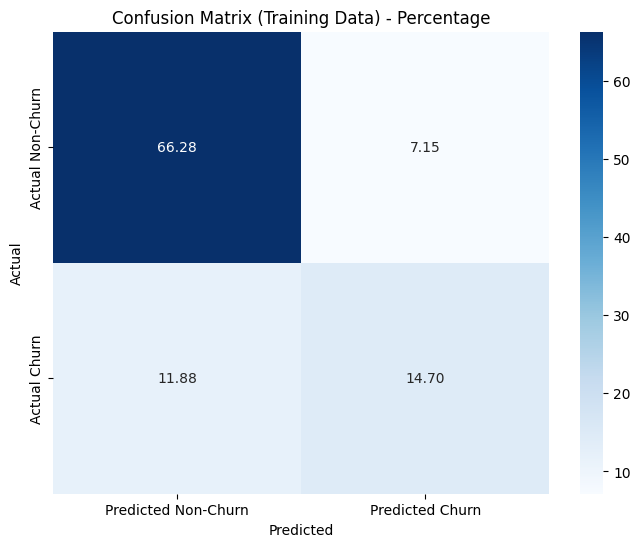

In [100]:
check_performance_train(Y_train_pred_bab)

Accuracy Score for test data: 0.7945984363894811
Recall for Test Data: 0.5053475935828877
Precision for Test Data: 0.6450511945392492
F1 Score for Test Data: 0.5667166416791605

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407


Confusion Matrix (Test Data)
[[929 104]
 [185 189]]


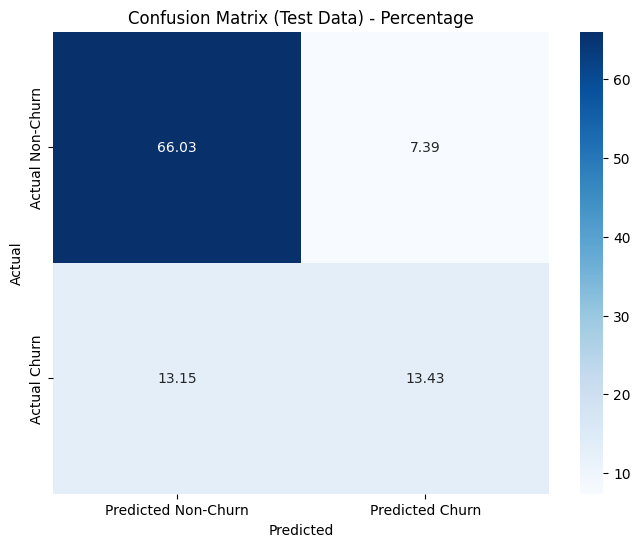

In [101]:
check_performance_test(Y_test_pred_bab)

In [102]:
df_adaboost = store_model_performance(df_adaboost, 'Best Adaboost', Y_train_pred_bab, Y_test_pred_bab)

In [103]:
df_adaboost

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Adaboost,0.810489,0.793888,0.567224,0.529412,0.669298,0.634615,0.614048,0.577259,7.448889,8.102345,11.502222,12.508884
1,Best Adaboost,0.809778,0.794598,0.553177,0.505348,0.672905,0.645051,0.607195,0.566717,7.146667,7.391613,11.875556,13.148543


**Performance Comparison:**

* The performance of the improved AdaBoost model using GridSearchCV is quite similar to the initial AdaBoost model.
* There are minor fluctuations in metrics. The accuracy score for test data slighly incresed from 79.39% to 79.46%.

**Recall and Precision:**

* The recall slightly decreased from 52.94% to 50.53% in the improved model.
* Precision improved slightly from 63.46% to 64.51%.

**F1-Score:**

* The F1-score remains relatively stable, slightly decreasing from 57.73% to 56.67%.

**False Negatives:**

* Both models demonstrate a similar performance in identifying false negatives, affecting the recall score for identifying churn cases (class 1), with the default model having fewer false negatives.

**GridSearchCV Impact:**

* The hyperparameter tuning using GridSearchCV didn’t significantly enhance the model's performance in terms of recall, precision, or F1-score compared to the initial model. While the accuracy score increased slightly, the recall score decreased and the percentage of false negatives also increased.
* However both the default Adaboost model and the improved Adaboost model showcase similar performance on both train and the test dataset and hence has very low variance and indicates a balanced model with no overfitting.

>> ### **Step 3.G.**
>> **Train a model using GradientBoost and check the performance of the model on train and test data**


---

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [105]:
gradient_boost = GradientBoostingClassifier(random_state=42)

In [106]:
gradient_boost.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [107]:
Y_train_pred_dgb = gradient_boost.predict(X_train)
Y_test_pred_dgb = gradient_boost.predict(X_test)

Accuracy Score for train data: 0.8266666666666667
Recall for Training Data: 0.5826086956521739
Precision for Training Data: 0.7127659574468085
F1 Score for Training Data: 0.6411483253588517

Classification report for Training Data:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4130
           1       0.71      0.58      0.64      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.75      0.76      5625
weighted avg       0.82      0.83      0.82      5625


Confusion Matrix (Training Data)
[[3779  351]
 [ 624  871]]


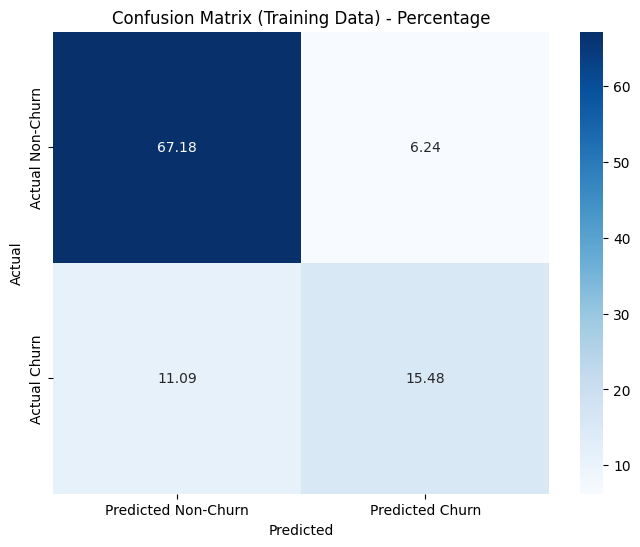

In [108]:
check_performance_train(Y_train_pred_dgb)

Accuracy Score for test data: 0.7889125799573561
Recall for Test Data: 0.4786096256684492
Precision for Test Data: 0.6370106761565836
F1 Score for Test Data: 0.5465648854961832

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix (Test Data)
[[931 102]
 [195 179]]


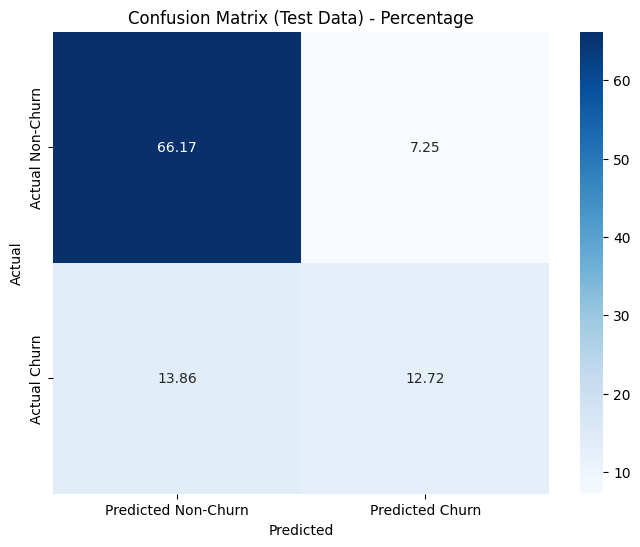

In [109]:
check_performance_test(Y_test_pred_dgb)

In [110]:
df_gradient_boost = store_model_performance(df_gradient_boost, 'Default Gradient Boost', Y_train_pred_dgb, Y_test_pred_dgb)

In [111]:
df_gradient_boost

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Gradient Boost,0.826667,0.788913,0.582609,0.47861,0.712766,0.637011,0.641148,0.546565,6.24,7.249467,11.093333,13.859275


**Performance Overview:**

* The GradientBoost model shows a decent performance with an accuracy of approximately 82.67% on the training data and 78.89% on the test data, suggesting a balanced model with no overfitting.

**Recall and Precision:**

* The model achieved a good recall of 58.26% on the training data but a  lower recall of 47.86% on the test data.
* Precision of 71.28% on the training data and 63.70% on the test data indicates that the model identifies a substantial proportion of true positives among the predicted positives.

**F1-Score:**

* The F1-score, a balance between precision and recall, is around 64.11% on the training data and 54.66% on the test data.

**False Negatives:**

* Like previous models, the GradientBoost model struggles with identifying false negatives, impacting the recall score for identifying churn cases (class 1).

**Model Comparison:**

* In comparison to previous models, GradientBoost performs well in terms of accuracy and precision on both training and test data but relatively less well in recall, especially on the test data.
* The GradientBoost model shows a promising performance with good precision but struggles with achieving high recall, crucial for identifying potential churners.
* We can try hyperparamter tuning to further optimize or fine-tune to reduce false negatives and improve the recall score.

>> ### **Step 3.H.**
>> **Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h**


---

>>> #### **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fit the grid search to your training data
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.5, 0.8],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.01, 0.1, 0.2],
    'validation_fraction': [0.2],  # Validation set for early stopping
    'n_iter_no_change': [5]  # Stops when no improvement after this number of iterations
}

# Create the GridSearchCV instance with scoring set to 'recall'
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='recall',verbose = 3)

In [ ]:
# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END learning_rate=0.1, loss=log_loss, min_impurity_decrease=0.01, min_samples_split=2, n_estimators=50, n_iter_no_change=5, validation_fraction=0.2;, score=0.515 total time=   0.3s
[CV 2/5] END learning_rate=0.1, loss=log_loss, min_impurity_decrease=0.01, min_samples_split=2, n_estimators=50, n_iter_no_change=5, validation_fraction=0.2;, score=0.508 total time=   0.3s
[CV 3/5] END learning_rate=0.1, loss=log_loss, min_impurity_decrease=0.01, min_samples_split=2, n_estimators=50, n_iter_no_change=5, validation_fraction=0.2;, score=0.495 total time=   0.3s
[CV 4/5] END learning_rate=0.1, loss=log_loss, min_impurity_decrease=0.01, min_samples_split=2, n_estimators=50, n_iter_no_change=5, validation_fraction=0.2;, score=0.515 total time=   0.3s
[CV 5/5] END learning_rate=0.1, loss=log_loss, min_impurity_decrease=0.01, min_samples_split=2, n_estimators=50, n_iter_no_change=5, validation_fraction=0.2;, score=0.535 total 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 0.8],
                         'loss': ['log_loss', 'exponential'],
                         'min_impurity_decrease': [0.01, 0.1, 0.2],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'n_iter_no_change': [5],
                         'validation_fraction': [0.2]},
             scoring='recall', verbose=3)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:")
print(best_params)
print("Best Score:", best_score)

Best Parameters:
{'learning_rate': 0.8, 'loss': 'exponential', 'min_impurity_decrease': 0.01, 'min_samples_split': 5, 'n_estimators': 50, 'n_iter_no_change': 5, 'validation_fraction': 0.2}
Best Score: 0.5471571906354515


>>> #### **Training using the best model**

In [112]:
# Create a Gradient Boosting classifier with the best parameters
best_gradient_boost = GradientBoostingClassifier(
    learning_rate=0.8,
    loss = 'exponential',
    min_impurity_decrease = 0.01,
    min_samples_split = 5,
    n_estimators = 50,
    validation_fraction = 0.2,
    n_iter_no_change = 5,
    random_state=42
)

# Train the model on the training data
best_gradient_boost.fit(X_train, Y_train)

# Make predictions on the test data
Y_train_pred_bgb = best_gradient_boost.predict(X_train)
Y_test_pred_bgb = best_gradient_boost.predict(X_test)

Accuracy Score for train data: 0.8202666666666667
Recall for Training Data: 0.5906354515050167
Precision for Training Data: 0.6887675507020281
F1 Score for Training Data: 0.6359380626575442

Classification report for Training Data:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4130
           1       0.69      0.59      0.64      1495

    accuracy                           0.82      5625
   macro avg       0.77      0.75      0.76      5625
weighted avg       0.81      0.82      0.82      5625


Confusion Matrix (Training Data)
[[3731  399]
 [ 612  883]]


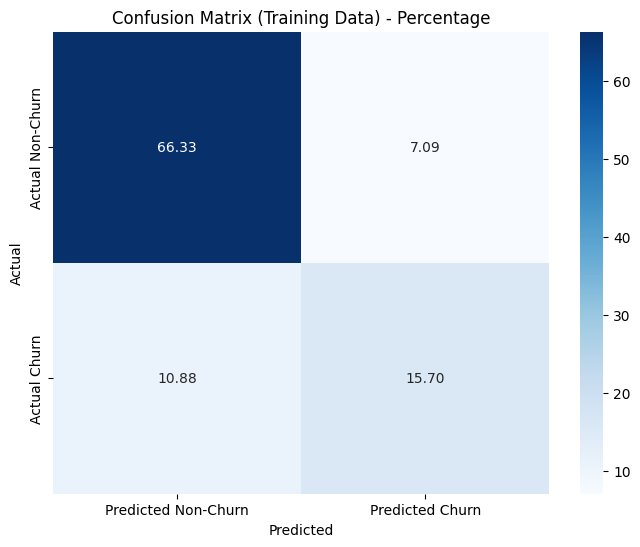

In [113]:
check_performance_train(Y_train_pred_bgb)

Accuracy Score for test data: 0.7910447761194029
Recall for Test Data: 0.5187165775401069
Precision for Test Data: 0.6298701298701299
F1 Score for Test Data: 0.5689149560117301

Classification report for Test Data:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix (Test Data)
[[919 114]
 [180 194]]


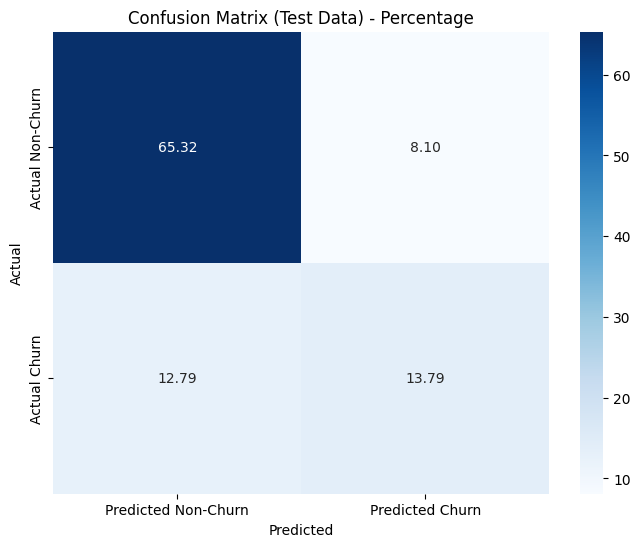

In [114]:
check_performance_test(Y_test_pred_bgb)

In [115]:
df_gradient_boost = store_model_performance(df_gradient_boost, 'Best Gradient Boost', Y_train_pred_bgb, Y_test_pred_bgb)

In [116]:
df_gradient_boost

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Gradient Boost,0.826667,0.788913,0.582609,0.478610,0.712766,0.637011,0.641148,0.546565,6.240000,7.249467,11.093333,13.859275
1,Best Gradient Boost,0.820267,0.791045,0.590635,0.518717,0.688768,0.629870,0.635938,0.568915,7.093333,8.102345,10.880000,12.793177


**Differences Observed:**

**Performance Comparison:**

* The refined model showcases slight improvements in training and test accuracy compared to the default GradientBoost model with the test accuracy increasing from 78.89% to 79.1%.
* Also there is not much variance between train and test performance indicating a balanced model with less overfitting.

**Recall and Precision:**

* Recall improves from 47.86% to 51.87% on the test data, indicating better identification of churn cases.
* Precision slightly decreases from 63.70% to 62.99% on the test data, maintaining a good balance between true positives and false positives.

**F1-Score:**

* The F1-score shows a minor enhancement from 54.66% to 56.89% on the test data, reflecting the overall model's balance between precision and recall.

**False Negatives:**

* The number of false negatives reduced from 13.86% to 12.79%, contributing to the improved recall in the refined model.

**Overall Observation:**
* The refined GradientBoost model demonstrates modest improvement in identifying potential churn cases by decreasing false negatives, resulting in improved recall while maintaining a balanced precision. This aligns better with the project's goal of reducing churn by identifying potential customers more accurately.

>> ### **Step 3.I.**
>> **Provide detailed analysis of the below steps**
1. Compare the performance of each model in train stage and test stage.
2. Provide your observation on which model performed the best
3. Provide your reasoning on why the model performed best
4. Provide your final conclusion on your observation

---

In [117]:
df_combined = pd.concat([df_decision_tree, df_random_forest, df_adaboost, df_gradient_boost], ignore_index=True)

In [118]:
df_combined

,Model Name,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Train False Positives,Test False Positives,Train False Negatives,Test False Negatives
0,Default Decision tree,0.997689,0.717129,0.992642,0.508021,0.998654,0.470297,0.995639,0.488432,0.035556,15.209666,0.195556,13.077470
1,Best Decision tree,0.790933,0.787491,0.410033,0.395722,0.675854,0.669683,0.510408,0.497479,5.226667,5.188344,15.680000,16.062544
2,Default Random Forest,0.997689,0.782516,0.995318,0.475936,0.995984,0.618056,0.995651,0.537764,0.106667,7.818053,0.124444,13.930348
3,Best Random Forest,0.963022,0.800995,0.881605,0.481283,0.977020,0.676692,0.926864,0.562500,0.551111,6.112296,3.146667,13.788202
4,Default Adaboost,0.810489,0.793888,0.567224,0.529412,0.669298,0.634615,0.614048,0.577259,7.448889,8.102345,11.502222,12.508884
5,Best Adaboost,0.809778,0.794598,0.553177,0.505348,0.672905,0.645051,0.607195,0.566717,7.146667,7.391613,11.875556,13.148543
6,Default Gradient Boost,0.826667,0.788913,0.582609,0.478610,0.712766,0.637011,0.641148,0.546565,6.240000,7.249467,11.093333,13.859275
7,Best Gradient Boost,0.820267,0.791045,0.590635,0.518717,0.688768,0.629870,0.635938,0.568915,7.093333,8.102345,10.880000,12.793177




---


* Since the project objective is to build a model that will help to identify the
potential customers who have a higher probability to churn, which in turn will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention, reducing False negatives i.e miscalssifying potential churners as non-churners is more more critical and hence we will prefer a model with higher recall.
* The **Default Decision Tree,  Default Random Forest** and the **best Random Forest** models appear to be overfit with high variance in performance between train and test data.
* The **Best Decision Tree model** though has good accuracy and less variance between test and train data, but has less recall compared to the other models.
* **Default Adaboost model, Best Adaboost model, Default Random Forestmodel** and the **Best Random forest model**, all have very good performance and have similar performance in both train and test data.
* The model with best test accuracy is the **Best Adaboost model**. However it has a lower recall score than the **Deafult Adaboost Model**.
* The **Default Gradient Boost** model has a low recall score compared to the other models.
* We are able to improve the performance of the Gradient Boost model by fine-tuning it. The **Best Gradient Boost** model has significantly high accuracy and a good recall of 51.87%. However, it is still less than that of the **default Adaboost model**.
* Thus we choose the **Default Adaboost Model** as the best model. Let's check the test performance of the model again.


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



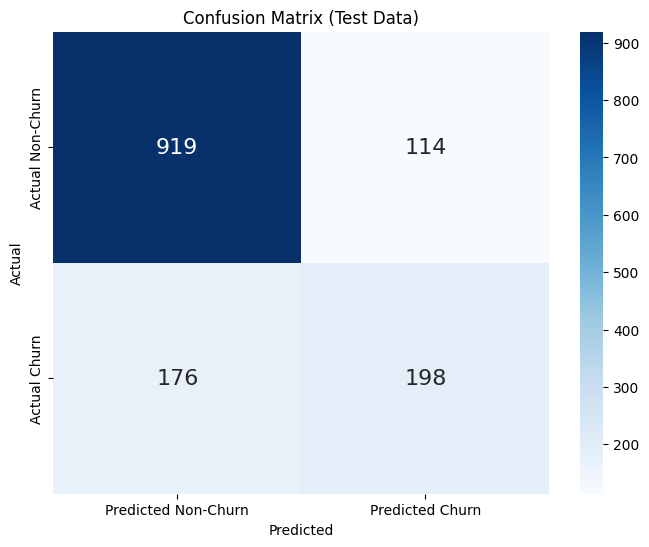

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have Y_test (true labels) and Y_test_pred (predicted labels) defined

# Print classification report
print("Classification Report:\n", classification_report(Y_test, Y_test_pred_dab))

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred_dab)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16}, xticklabels=['Predicted Non-Churn', 'Predicted Churn'], yticklabels=['Actual Non-Churn', 'Actual Churn'])
#sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

We choose the **Default Adaboost Model** as the best model.

**REASON:**

* It has the highest recall value of 52.94% and does best at minimizing the number of false negatives to 12.51%.
* It also has the highest F1 score indicating the best balance between recall and precision.
* Its precision value too is comparable to the other models with highest precision.
* Moreover it has the second highest test accuracy score of 79.39% which is quite close to the highest test accuracy score.
* Its performance on the train and test data is similar indicating that it is a balanced model with no overfitting.

**CONCLUSION:**

**Best Model:**
* Default Adaboost model emerged as the most balanced and reliable model among the others with the highest recall and f1 scores, lowest false negatives and good accuracy and precision comparable to the other good models.
* Its ability to handle overfitting, maintain a good balance between precision and recall, and generalize well to unseen data makes it a preferable choice for predicting potential customer churn in this scenario.

**Data Imbalance and Model Bias:**
* The target column containing 73.4% negatives (non-churners) and only 26.6% positives (churners) suggests a significant class imbalance.
* Due to this imbalance, models tend to lean towards predicting the majority class (negatives) more accurately.
* **Precision-Recall Trade-off:** Models optimized to minimize false positives (maximize precision) tend to classify negatives correctly but might struggle to capture all positives (churners), leading to lower recall scores.
* This bias towards the majority class might result in higher precision scores compared to recall scores, as observed in the models.
* **Effects on Model Tuning and Performance Enhancement:** The class imbalance affects the fine-tuning process. Despite efforts to optimize for recall in grid search or other tuning techniques, achieving significantly higher recall becomes challenging due to the skewed data distribution.
* Models tend to have higher precision (correctly predicting negatives) but struggle to capture all instances of the minority class (churners), leading to lower recall scores.
